In [1]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
print("labels= "+str(np.unique(train_labels)))
print("shape of training set: "+str(train_images.shape[0])+"\nshape of test set: "+str(test_images.shape[0]))

labels= [0 1 2 3 4 5 6 7 8 9]
shape of training set: 60000
shape of test set: 10000


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

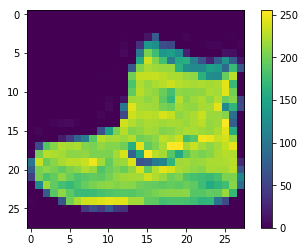

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

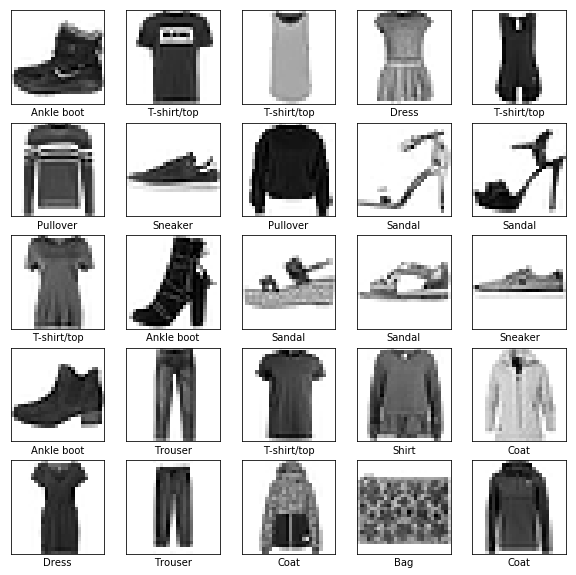

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model=keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)])

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 12s 192us/step - loss: 0.4952 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.3727 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 10s 169us/step - loss: 0.3339 - acc: 0.8798
Epoch 4/5
60000/60000 [==============================] - 9s 158us/step - loss: 0.3121 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.2928 - acc: 0.8914


In [11]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 82us/step
Test accuracy: 0.8745


In [12]:
predictions = model.predict(test_images)

In [13]:
predictions[0]

array([2.4921199e-05, 1.3874605e-08, 6.0662792e-06, 5.2766779e-07,
       1.2096772e-05, 7.8316545e-03, 4.0169238e-05, 1.6146941e-01,
       4.0976176e-04, 8.3020538e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [16]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

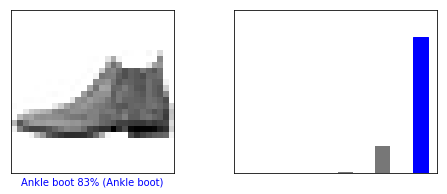

In [17]:
i = 0
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

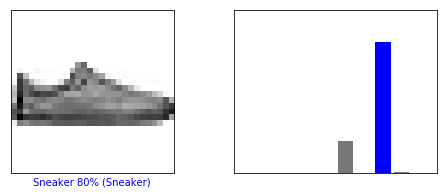

In [18]:
i = 12
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

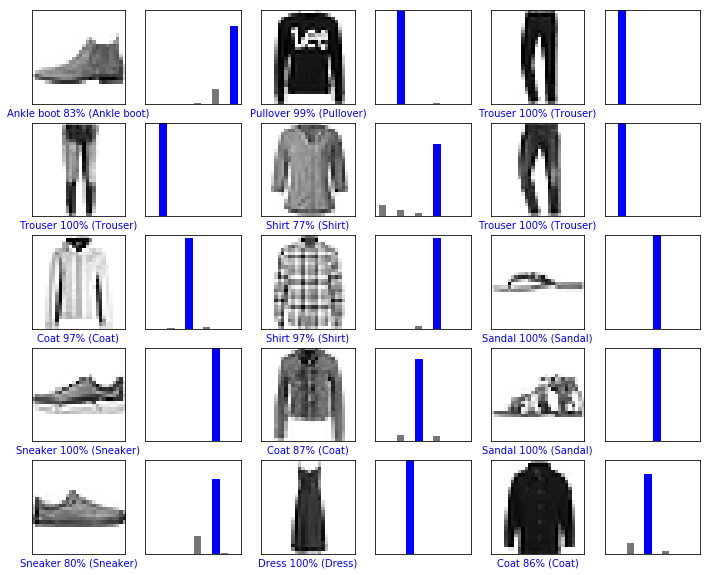

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(12, 10))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [20]:
img = test_images[0]
print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.49212007e-05 1.38746055e-08 6.06627964e-06 5.27667339e-07
  1.20967725e-05 7.83164706e-03 4.01692014e-05 1.61469355e-01
  4.09761444e-04 8.30205500e-01]]


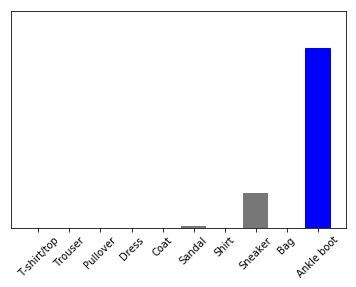

In [23]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
np.argmax(predictions_single[0])

9